# **연세-네이버클라우드 데이터사이언스 교육과정: 텍스트마이닝**

## 단어 빈도 분석 및 워드클라우드

박기영 (연세대 경제학부)


본격적인 NLP 분석에 들어가기 전에 흥미 유발을 위해 지금까지 배웠던 것을 중심으로 단어 빈도 분석 및 워드클라우드(word cloud)를 작성해 봄. 

02NLP_WordFrequency.ipynb의 목차

1. 필요한 라이브러리 불러오기
2. Project Gutenberg에서 책 불러오기
3. HTML에서 텍스트 추출하기
4. 전처리
5. 시각화
6. Homework


In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas_datareader as pdr
from datetime import date

import seaborn as sns

%config InlineBackend.figure_format = 'retina'   # for retina display in Mac
np.set_printoptions(precision=3, suppress=True)  # for pretty display of numpy arrays
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=16)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
mpl.rc('font', size=16)
plt.rc('legend', fontsize=16) 

# for Korean fonts 
plt.rcParams['axes.unicode_minus'] = False

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(14,8)})

## 필요한 라이브러리 불러오기

- requests: http 요청을 보내는 라이브러리. 사용법에 대한 간결한 정리는 [여기](https://dgkim5360.tistory.com/entry/python-requests) 
- beautifulsoup: HTML, XML 파일에서 정보를 뽑아내는 파이썬 라이브러리 (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [3]:
# Importing requests, BeautifulSoup and nltk
import requests
from bs4 import BeautifulSoup
import nltk

## Adam Smith의 *국부론* 불러오기

[Project Gutenberg](https://www.gutenberg.org/)에서 Adam Smith의 국부론 불러오기 

- 아래는 프로젝트 구텐베르크 홈페이지

In [4]:
from IPython.display import IFrame
IFrame('https://www.gutenberg.org/', width=800, height=350)

  - 프로젝트 구텐베르크 소개

In [5]:
from IPython.display import IFrame
IFrame('https://ko.wikipedia.org/wiki/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EA%B5%AC%ED%85%90%EB%B2%A0%EB%A5%B4%ED%81%AC', width=800, height=350)

In [6]:
# Getting the book in HTML format 
r = requests.get('https://www.gutenberg.org/files/3300/3300-h/3300-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>An Inquiry into the Nature and Causes of the Wealth of Nations, by Adam Smith</title>

<style type="text/css">

body { background:#faebd0;
       margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

h1, h2, h3, h4, h5 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 175%; margin-top: 2em; margin-bottom: 2em;}
h3 {font-size: 150%; margin-top: 2em;}
h4 {font-size: 120%;}
h5 {font-size: 110%;}

hr {width: 80%; margin-top: 2e

## HTML에서 텍스트 추출하기 

In [7]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

# Getting the text out of the soup
text = soup.get_text()

# locate 'the benevolence of the butcher'
ind_text = text.index('the benevolence of the butcher')
print(ind_text)

# Printing out text between characters 32000 and 34000
print(text[round(ind_text,-3)-300: round(ind_text,-3)+700])

38220
ikely to prevail if he can interest
      their self-love in his favour, and shew them that it is for their own
      advantage to do for him what he requires of them. Whoever offers to
      another a bargain of any kind, proposes to do this. Give me that which I
      want, and you shall have this which you want, is the meaning of every such
      offer; and it is in this manner that we obtain from one another the far
      greater part of those good offices which we stand in need of. It is not
      from the benevolence of the butcher, the brewer, or the baker that we
      expect our dinner, but from their regard to their own interest. We address
      ourselves, not to their humanity, but to their self-love, and never talk
      to them of our own necessities, but of their advantages. Nobody but a
      beggar chooses to depend chiefly upon the benevolence of his
      fellow-citizens. Even a beggar does not depend upon it entirely. The
      charity of well-disposed 


## 전처리

* 토근화
* 소문자화
* 불용어(stop words) 제거

In [8]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 7 words / tokens 
print(tokens[:7])

['An', 'Inquiry', 'into', 'the', 'Nature', 'and', 'Causes']


In [9]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 7 words (tokens) 
print(words[:7])

['an', 'inquiry', 'into', 'the', 'nature', 'and', 'causes']


In [11]:
# Getting the English stop words from nltk
nltk.download('stopwords')
sw = nltk.corpus.stopwords.words('english')

# Printing out the first 10 stop words
print(sw[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [12]:
# to save tokens without stop words  
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Printing the first 7 words_ns to check that stop words are gone
print(words_ns[:7])

['inquiry', 'nature', 'causes', 'wealth', 'nations', 'adam', 'smith']


## 시각화

### 출현 빈도가 높은 단어들

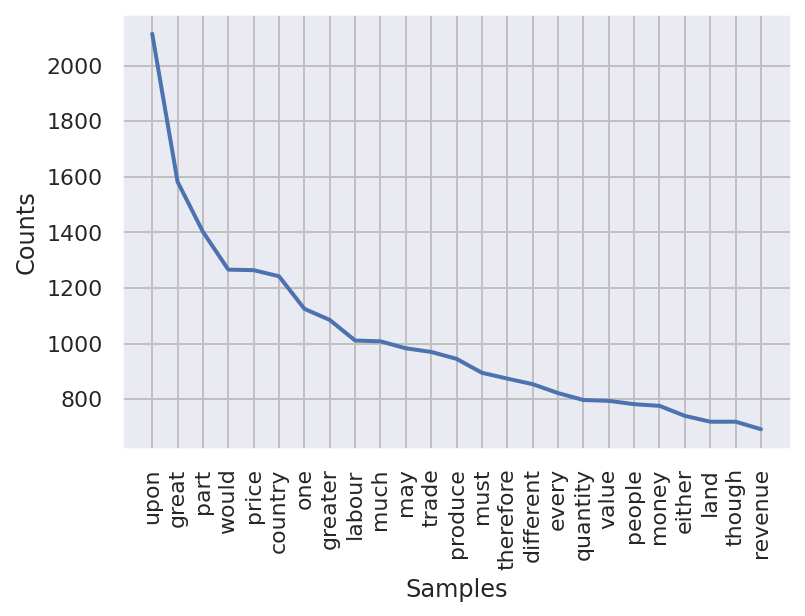

In [13]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
freqdist.plot(25)

### Word Cloud

In [14]:
!pip install wordcloud

In [15]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [17]:
# WordCloud 안에 들어가는 형식의 텍스트로 만들기
# words_ns는 ['inquiry','nature','causes',...]의 형태이나 [inquiry nature causes ...]의 형태가 필요

sample1 = words_ns[:7]
print(sample1)

text1 = " ".join(sample1)
text2 = "".join(sample1)
text3 = ", ".join(sample1)
text4 = " ".join(map(str, sample1))   # text1 makes error when words_ns includes numbers

print('text1 =', text1)
print('text2 =', text2)
print('text3 =', text3)
print('text4 =', text4)

['inquiry', 'nature', 'causes', 'wealth', 'nations', 'adam', 'smith']
text1 = inquiry nature causes wealth nations adam smith
text2 = inquirynaturecauseswealthnationsadamsmith
text3 = inquiry, nature, causes, wealth, nations, adam, smith
text4 = inquiry nature causes wealth nations adam smith


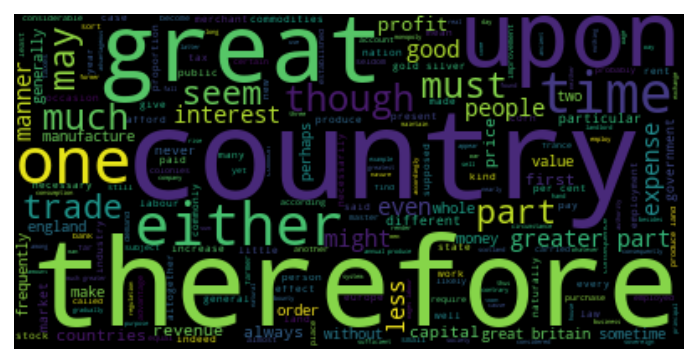

In [18]:
# words_ns 를 WordCloud에 맞게 변환
text_cloud = " ".join(words_ns)

# Create and generate a word cloud image:
wordcloud = WordCloud()
wordcloud = wordcloud.generate(text_cloud)

# Display the generated image:
# for more info on interpolation: https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

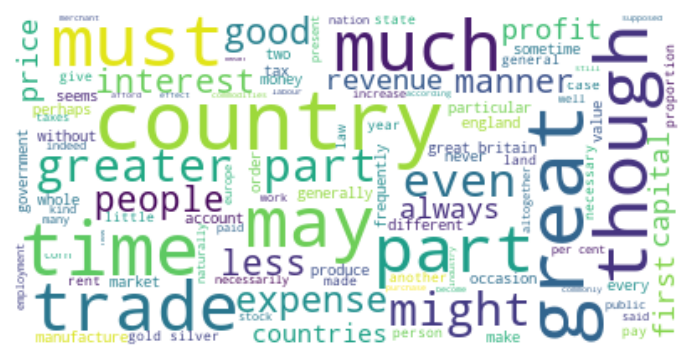

In [19]:
# WordCloud 불용어 설정
stopwords = set(STOPWORDS) 

# stop words 추가
custom_stopwords = ['therefore','either','upon','one','seem']
stopwords.update(custom_stopwords)
#[stopwords.add(n) for n in custom_stopwords] # alternative way to add custom stop words

# 여러 옵션들을 추가할 수 있음
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white")
wordcloud = wordcloud.generate(text_cloud)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()